In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import collections as coll
from glob import glob
fs=11

path  = '/media/storage_3/mb/nanopore_data/analysis/'
bisulfite = 'bed_files/chr22.tsv'
rockfish_base  = 'r9.4.1/20200914_1354_6B_PAF27096_e7c9eae6/guppy_v4.0.11_r9.4.1_hac_prom/align_unfiltered/chr22/freqs_base/'
rockfish_small = 'r9.4.1/20200914_1354_6B_PAF27096_e7c9eae6/guppy_v4.0.11_r9.4.1_hac_prom/align_unfiltered/chr22/freqs_small/'
rf_header = ['contig', 'start', 'end', 'freq', 'n_mod', 'n_nomod']

In [2]:
df_bsulf = pd.read_csv(path+bisulfite, sep='\t')
df_bsulf.drop(columns=['chr', 'name', 'tstart', 'tend', 'strand', 'color'], inplace=True)
df_bsulf.sort_values('start', inplace=True)

# A biszulfit adatok egyesével lépkednek a start-end között
set(df_bsulf.end.values -  df_bsulf.start.values)

{1}

In [3]:
# Base modell:
df_rfish_base = pd.read_csv(path+rockfish_base+'all_freq.tsv', sep='\t', names=rf_header)
df_rfish_base.freq*=100
print(len(df_rfish_base))
df_rfish_small= pd.read_csv(path+rockfish_small+'all_freq.tsv', sep='\t', names=rf_header)
df_rfish_small.freq*=100
print(len(df_rfish_small))

1197427
1197427


## Biszulfit és Rockfish base modell összehasonlítás

In [4]:
# Azon pozíciók száma, amely NEM létezik mindkét
print(len(set(df_bsulf.start) - set(df_rfish_base.start)) + len(set(df_rfish_base.start) - set(df_bsulf.start)))

4202


In [5]:
intersect = np.intersect1d(df_rfish_base.start, df_bsulf.start)
print('len(intersect) =',len(intersect))
r = 0 #round
div = 5 
isc_bsulf_fr = (np.round(df_bsulf.loc[df_bsulf.start.isin(intersect)].freq.values, r)/div).astype(int)
isc_rfish_base_fr = (np.round(df_rfish_base.loc[df_rfish_base.start.isin(intersect)].freq.values, r)/div).astype(int)
fr_bins = max(isc_bsulf_fr)
isc_bsulf_fr[isc_bsulf_fr==fr_bins] -= 1
isc_rfish_base_fr[isc_rfish_base_fr==fr_bins] -= 1

mtx1 = np.zeros((fr_bins,fr_bins))
for i in range(len(intersect)):
    mtx1[isc_rfish_base_fr[i], isc_bsulf_fr[i]]+=1

len(intersect) = 1196530


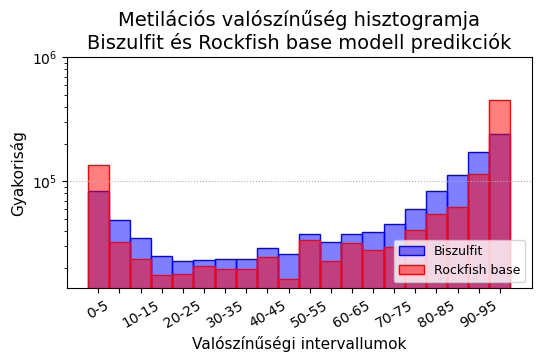

In [6]:
plt.figure(figsize=(6,3))
plt.hist(df_bsulf.freq.values, range=(0,100), bins=fr_bins, fc=(0, 0, 1, 0.5),
        label='Biszulfit', edgecolor='blue', linewidth=1)
plt.hist(df_rfish_base.freq.values, range=(0,100), bins=fr_bins, fc=(1, 0, 0, 0.5), 
        label='Rockfish base', edgecolor='red', linewidth=1) 

percent_boundaries = [f'{i*10}-{(i+1)*10-5}'  for i in np.linspace(0,9,10, dtype=int)]
ax_ticks = [percent_boundaries[int(i/2)] if i%2==0 else '' for i in range(20)] 
plt.xticks(np.arange(0,100,5)+2.5, ax_ticks, rotation=30)
plt.title('Metilációs valószínűség hisztogramja\nBiszulfit és Rockfish base modell predikciók', fontsize=fs+3)
plt.xlabel('Valószínűségi intervallumok', fontsize=fs)
plt.ylabel('Gyakoriság', fontsize=fs)
plt.yscale('log')
plt.grid(axis='y', ls='dotted')
plt.ylim(top=1e6)
plt.legend(fontsize=fs-2, loc='lower right')
plt.savefig('figs/methyl_hist_base.pdf', bbox_inches='tight')
plt.show()

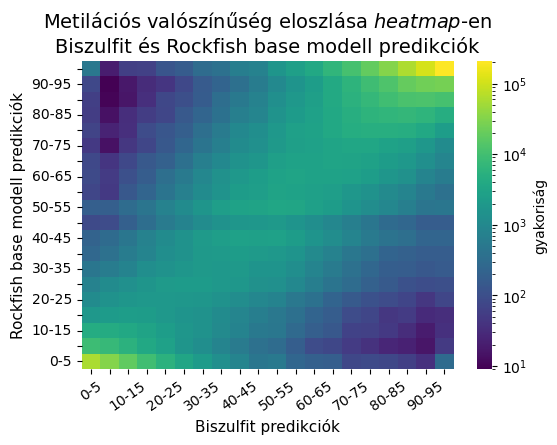

In [7]:
plt.figure(figsize=(6,4))
ax = sns.heatmap(mtx1, norm=LogNorm(), cmap='viridis', cbar_kws={'label': 'gyakoriság'})

cbar = ax.collections[0].colorbar
cbar.set_ticks([10, 1e2, 1e3, 1e4, 1e5])
cbar.set_ticklabels([f'$10^{i}$' for i in range(1,6) ])
percent_boundaries = [f'{i*10}-{(i+1)*10-5}'  for i in np.linspace(0,9,10, dtype=int)]
ax_ticks = [percent_boundaries[int(i/2)] if i%2==0 else '' for i in range(20)] 
ax.set_xticks(np.arange(0,fr_bins)+0.5, ax_ticks, rotation=35)
ax.set_yticks(np.arange(0,fr_bins)+0.5, ax_ticks, rotation=0)
ax.set_title('Metilációs valószínűség eloszlása $heatmap$-en\nBiszulfit és Rockfish base modell predikciók', fontsize=fs+3)
ax.set_xlabel('Biszulfit predikciók', fontsize=fs)
ax.set_ylabel('Rockfish base modell predikciók', fontsize=fs)
ax.invert_yaxis()
plt.savefig('figs/methyl_corr_base.pdf', bbox_inches='tight')
plt.show()

## Biszulfit és Rockfish small modell összehasonlítás


In [8]:
# Azon pozíciók száma, amely nem létezik mindkét
print(len(set(df_bsulf.start) - set(df_rfish_small.start)) + len(set(df_rfish_small.start) - set(df_bsulf.start)))

4202


In [9]:
intersect = np.intersect1d(df_rfish_small.start, df_bsulf.start) # isc = intersect
print('len(intersect) =',len(intersect))
r = 0 #round
div = 5  
isc_bsulf_fr = (np.round(df_bsulf.loc[df_bsulf.start.isin(intersect)].freq.values, r)/div).astype(int)
isc_rfish_small_fr = (np.round(df_rfish_small.loc[df_rfish_small.start.isin(intersect)].freq.values, r)/div).astype(int)
fr_bins = max(isc_bsulf_fr)
print('fr_bins =', fr_bins )
isc_bsulf_fr[isc_bsulf_fr==fr_bins] -= 1
isc_rfish_small_fr[isc_rfish_small_fr==fr_bins] -= 1

mtx2 = np.zeros((fr_bins,fr_bins))
for i in range(len(intersect)):
    mtx2[isc_rfish_small_fr[i], isc_bsulf_fr[i]]+=1

len(intersect) = 1196530
fr_bins = 20


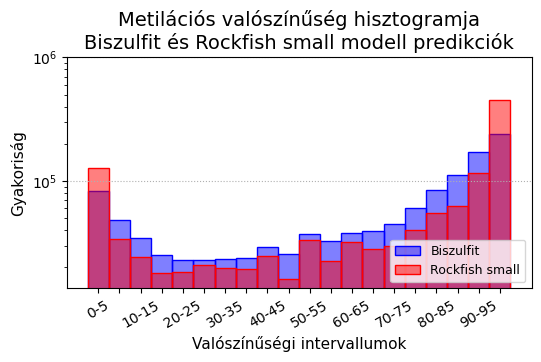

In [10]:
plt.figure(figsize=(6,3))
plt.hist(df_bsulf.freq.values, range=(0,100), bins=fr_bins, fc=(0, 0, 1, 0.5),
        label='Biszulfit', edgecolor='blue', linewidth=1) 
plt.hist(df_rfish_small.freq.values, range=(0,100), bins=fr_bins, fc=(1, 0, 0, 0.5),
        label='Rockfish small', edgecolor='red', linewidth=1) 


percent_boundaries = [f'{i*10}-{(i+1)*10-5}'  for i in np.linspace(0,9,10, dtype=int)]
ax_ticks = [percent_boundaries[int(i/2)] if i%2==0 else '' for i in range(20)] 
plt.xticks(np.arange(0,100,5)+2.5, ax_ticks, rotation=30)
plt.title('Metilációs valószínűség hisztogramja\nBiszulfit és Rockfish small modell predikciók', fontsize=fs+3)
plt.xlabel('Valószínűségi intervallumok', fontsize=fs)
plt.ylabel('Gyakoriság', fontsize=fs)
plt.yscale('log')
plt.grid(axis='y', ls='dotted')
plt.ylim(top=1e6)
plt.legend(fontsize=fs-2, loc='lower right')
plt.savefig('figs/methyl_hist_small.pdf', bbox_inches='tight')
plt.show()

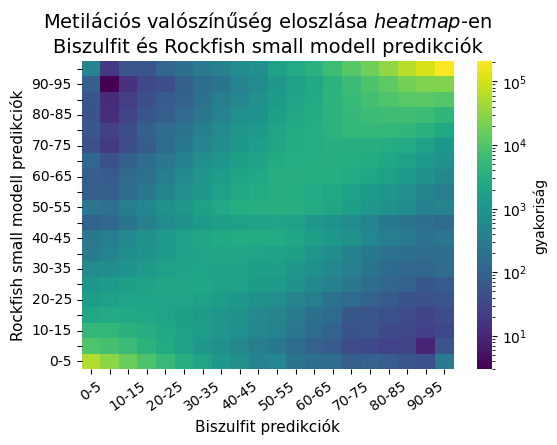

In [11]:
plt.figure(figsize=(6,4))
ax = sns.heatmap(mtx2, norm=LogNorm(), cmap='viridis', cbar_kws={'label': 'gyakoriság'})

cbar = ax.collections[0].colorbar
cbar.set_ticks([10, 1e2, 1e3, 1e4, 1e5])
cbar.set_ticklabels([f'$10^{i}$' for i in range(1,6) ])
percent_boundaries = [f'{i*10}-{(i+1)*10-5}'  for i in np.linspace(0,9,10, dtype=int)]
ax_ticks = [percent_boundaries[int(i/2)] if i%2==0 else '' for i in range(20)] 
ax.set_xticks(np.arange(0,fr_bins)+0.5, ax_ticks, rotation=35)
ax.set_yticks(np.arange(0,fr_bins)+0.5, ax_ticks, rotation=0)
ax.set_title('Metilációs valószínűség eloszlása $heatmap$-en\nBiszulfit és Rockfish small modell predikciók', fontsize=fs+3)
ax.set_xlabel('Biszulfit predikciók', fontsize=fs)
ax.set_ylabel('Rockfish small modell predikciók', fontsize=fs)
ax.invert_yaxis()
plt.savefig('figs/methyl_corr_small.pdf', bbox_inches='tight')
plt.show()

## Rockfish base és Rockfish small modell összehasonlítás


In [12]:
# Azon pozíciók száma, amely nem létezik mindkét
print(len(set(df_rfish_base.start) - set(df_rfish_small.start)) + len(set(df_rfish_small.start) - set(df_rfish_base.start)))

0


In [13]:
intersect = np.intersect1d(df_rfish_small.start, df_rfish_base.start) # isc = intersect
print('len(intersect) =',len(intersect))
r = 0 #round
div = 5  
isc_rfish_base_fr = (np.round(df_rfish_base.loc[df_rfish_base.start.isin(intersect)].freq.values, r)/div).astype(int)
isc_rfish_small_fr = (np.round(df_rfish_small.loc[df_rfish_small.start.isin(intersect)].freq.values, r)/div).astype(int)
fr_bins = max(isc_rfish_base_fr)
print('fr_bins =', fr_bins )
isc_rfish_base_fr[isc_rfish_base_fr==fr_bins] -= 1
isc_rfish_small_fr[isc_rfish_small_fr==fr_bins] -= 1

mtx3 = np.zeros((fr_bins,fr_bins))
for i in range(len(intersect)):
    mtx3[isc_rfish_small_fr[i], isc_rfish_base_fr[i]]+=1
mtx3[mtx3==0]=0.1

len(intersect) = 1197427
fr_bins = 20


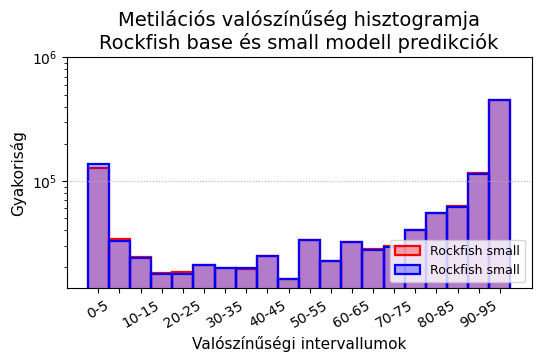

In [14]:
plt.figure(figsize=(6,3))
plt.hist(df_rfish_small.freq.values, range=(0,100), bins=fr_bins, fc=(1, 0, 0, 0.3),
        label='Rockfish small', edgecolor='red', linewidth=1.6) 
plt.hist(df_rfish_base.freq.values, range=(0,100), bins=fr_bins, fc=(0, 0, 1, 0.3),
        label='Rockfish small', edgecolor='blue', linewidth=1.6)

percent_boundaries = [f'{i*10}-{(i+1)*10-5}'  for i in np.linspace(0,9,10, dtype=int)]
ax_ticks = [percent_boundaries[int(i/2)] if i%2==0 else '' for i in range(20)] 
plt.xticks(np.arange(0,100,5)+2.5, ax_ticks, rotation=30)
plt.title('Metilációs valószínűség hisztogramja\nRockfish base és small modell predikciók', fontsize=fs+3)
plt.xlabel('Valószínűségi intervallumok', fontsize=fs)
plt.ylabel('Gyakoriság', fontsize=fs)
plt.yscale('log')
plt.grid(axis='y', ls='dotted')
plt.ylim(top=1e6)
plt.legend(fontsize=fs-2, loc='lower right')
plt.savefig('figs/methyl_hist_rfish_models.pdf', bbox_inches='tight')
plt.show()

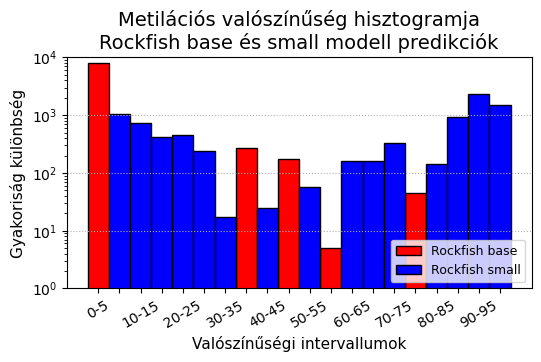

In [15]:
rf_base_hist = np.histogram(df_rfish_base.freq.values, fr_bins, )
rf_small_hist =  np.histogram(df_rfish_small.freq.values, fr_bins, )
diff = rf_small_hist[0]-rf_base_hist[0] 

plt.figure(figsize=(6,3))
plt.bar(range(fr_bins), height=(abs((diff<0).astype(int)*diff)), label='Rockfish base',
        edgecolor='black', linewidth=1, color='red', width = 1) 
plt.bar(range(fr_bins), height=(abs((diff>0).astype(int)*diff)), label='Rockfish small',
        edgecolor='black', linewidth=1, color='blue', width = 1) 

percent_boundaries = [f'{i*10}-{(i+1)*10-5}'  for i in np.linspace(0,9,10, dtype=int)]
ax_ticks = [percent_boundaries[int(i/2)] if i%2==0 else '' for i in range(20)] 
plt.xticks(np.linspace(0,19,20), ax_ticks, rotation=30)
plt.title('Metilációs valószínűség hisztogramja\nRockfish base és small modell predikciók', fontsize=fs+3)
plt.xlabel('Valószínűségi intervallumok', fontsize=fs)
plt.ylabel('Gyakoriság különbség', fontsize=fs)
plt.yscale('log')
plt.legend(fontsize=fs-2, loc='lower right')
plt.grid(axis='y', ls='dotted')
plt.ylim(1,1e4)
plt.savefig('figs/methyl_hist_rf_models_diff.pdf', bbox_inches='tight')
plt.show()

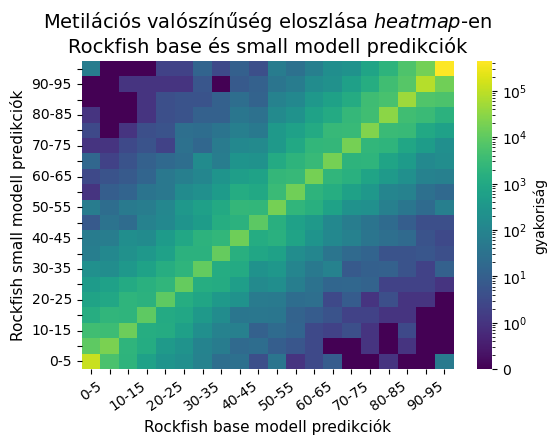

In [16]:
plt.figure(figsize=(6,4))
ax = sns.heatmap(mtx3, norm=LogNorm(), cmap='viridis', cbar_kws={'label': 'gyakoriság'})

cbar = ax.collections[0].colorbar
cbar.set_ticks([0.1, 1, 1e1, 1e2, 1e3, 1e4, 1e5])
cbar.set_ticklabels(['0']+[f'$10^{i}$' for i in range(6) ])
percent_boundaries = [f'{i*10}-{(i+1)*10-5}'  for i in np.linspace(0,9,10, dtype=int)]
ax_ticks = [percent_boundaries[int(i/2)] if i%2==0 else '' for i in range(20)] 
ax.set_xticks(np.arange(0,fr_bins)+0.5, ax_ticks, rotation=35)
ax.set_yticks(np.arange(0,fr_bins)+0.5, ax_ticks, rotation=0)
ax.set_title('Metilációs valószínűség eloszlása $heatmap$-en\nRockfish base és small modell predikciók', fontsize=fs+3)
ax.set_xlabel('Rockfish base modell predikciók', fontsize=fs)
ax.set_ylabel('Rockfish small modell predikciók', fontsize=fs)
ax.invert_yaxis()
plt.savefig('figs/methyl_corr_rfish_models.pdf', bbox_inches='tight')
plt.show()